## Summary

"Unsaved report
"October 1, 2018 - September 30, 2019"
"

The following data set if for an ecommerce company that sells tires.  The data set is from Google paid search queries related to Product Listing Ads (PLAs) which include Google Shopping queries. The search terms that include Client’s brand name have been excluded. Given this data, and any other information you want to add, what can you tell us? What information/visualizations can we share with the customer to help them position/re-position etc. How are people finding their products, and what can we do with this information?

Original Query Parameters:

Campaign Type: Google Shopping PLAs
Network: Google Search; Excluding all other Audience Extension Networks
Note: This file is based upon Search Terms (not Keywords), which are the actual queries that users typed in

Conversion Parameters (e.g., how is Conversions and Conversion Value calculated):

Includes the revenue generated from transactions that occur within 60 days of an ad click; multiple transactions within 60 days are counted
Conversion Values are modeled on a “Position-based attribution model”, which means that Google Ads allocates conversion value to ads based on: First Ad Click = 40%, Last Ad Click = 40%, All Middle Clicks = 20% (Linear Split)
As a result, Conversions and Conversion Values are not a perfect measure as we don’t know if the conversion value was due to a search query being the 1st click, last click, or a middle click

Calculations Not Included:
CV Gross Profit = Conversion Value * 20%
CV Gross Profit Less Ad Cost = (Conversion Value * 20% ) – Ad Cost
MCF Revenue = (Conversion Value * 50%)
MCF Gross Profit = ((Conversion Value * 50%) *20%) - https://www.ppchero.com/ultimate-guide-to-googles-multi-channel-funnels/
MCF Gross Profit Less Ad Cost = ((Conversion Value * 50%) * 20%) – Ad Cost

 - Impression: https://www.klipfolio.com/metrics/difference/ad-clicks-vs-ad-impressions#:~:text=Ad%20Clicks%2C%20or%20simply%20Clicks,to%20reach%20an%20online%20property.&text=Ad%20Impressions%20(IMPR)%20is%20a,screen%20within%20the%20publisher's%20network.
 
 - Impression Share: https://support.google.com/google-ads/answer/2497703?hl=en
  
 - Conversion: A conversion in Google Ads is when a user performs some specified action after clicking an ad or viewing a Display Network ad, such as purchasing a product, installing a mobile app, or signing up for an email list. Conversion tracking provides key insights into users' actions after viewing or clicking an ad.

In [120]:
df.head()

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
0,285 60r20 sale,USD,2.22,0.74,3,3,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-2.220,0.00,0.000,-2.220
1,325 45r22 nitto 420s,USD,0.22,0.22,1,1,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.220,0.00,0.000,-0.220
2,wild country at,USD,3.78,0.22,39,17,0.0,0.0,0.07,6.32,0.43,1.67,1.264,-2.516,3.16,0.632,-3.148
3,h w 100xt primex tires 7.50 16,USD,0.17,0.17,1,1,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.170,0.00,0.000,-0.170
4,285 75r16 at tires,USD,21.69,0.39,263,56,0.0,0.0,0.63,438.10,1.10,20.20,87.620,65.930,219.05,43.810,22.120


## Imports & Such

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as ran
%matplotlib inline

In [340]:
# Imports
# Natural Language Processing libraries, initiations and functions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re


# Preprocessing
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]',' ', text.lower())
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return " ".join([lemmer.lemmatize(word) for word 
                     in tokens if len(word) > 3 and not word in stop_words])



# Cvec, Standard
cvec = CountVectorizer(analyzer = "word",
                       min_df = 2,
                       preprocessor = preprocess,
                       stop_words = 'english') 
# Cvec DF
#df_words = pd.DataFrame(cvec.fit_transform(df['doc_column']).todense(), 
#                        columns=cvec.get_feature_names())

In [170]:
#df = 
df_raw = pd.read_csv('./data/Search_terms_cleaned.csv')#.columns

C:\Users\Peridot of Earth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Cleaning

In [121]:
df['Conv_value_cost'].sort_values()

0               0.0
1493555         0.0
1493554         0.0
1493553         0.0
1493552         0.0
             ...   
269525     158388.0
724416     170394.0
642928     264984.0
534102     271752.0
2205971    364000.0
Name: Conv_value_cost, Length: 2249703, dtype: float64

In [201]:
df.drop(['Currency', 'Impr_top_%', 'Impr_abs_top_%'], axis = 1, inplace = True)

In [ ]:
df.drop(['Currency','Impr_top_%','Impr. (Abs. Top) %'], axis = 1)

In [107]:
#ran.sample(list(df.index), 100)

In [108]:
#df['Search_term'].tail(20)#[20:40]

C:\Users\Peridot of Earth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


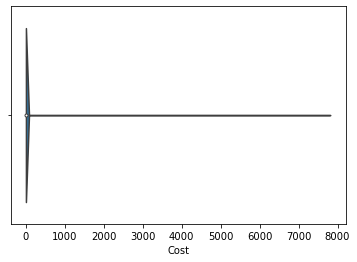

In [87]:
sns.violinplot(df['Cost'],
            data = df);
                #orient='v' or 'h',
                #fliersize=8,
                #linewidth=#,
                #notch = True,
                #saturation=0.5,
                #ax=ax,
                #by = "column?");

In [23]:
string = 'string'
string.

In [31]:
df['Clicks'] = df['Clicks'].map(lambda x: int(str(x).replace(',','')))
df['Impressions'] = df['Impressions'].map(lambda x: int(str(x).replace(',','')))

In [78]:
def fun_map(x):
    if type(x) == type(string):
        x = float(x.replace('%','').replace(',',''))
    return x

df['Cost'] = df['Cost'].map(lambda x: fun_map(x))
df['Impr. (Top) %'] = df['Impr. (Top) %'].map(lambda x: fun_map(x))
df['Impr. (Abs. Top) %'] = df['Impr. (Abs. Top) %'].map(lambda x: fun_map(x))
df['Conv. value'] = df['Conv. value'].map(lambda x: fun_map(x))
df['Conv. rate'] = df['Conv. rate'].map(lambda x: fun_map(x))
df['Conv. value / cost'] = df['Conv. value / cost'].map(lambda x: fun_map(x))

In [79]:
df.head()

,Search term,Currency,Cost,Avg. CPC,Impressions,Clicks,Impr. (Top) %,Impr. (Abs. Top) %,Conversions,Conv. value,Conv. rate,Conv. value / cost
0,285 60r20 sale,USD,2.22,0.74,3,3,0.0,0.0,0.00,0.00,0.00,0.00
1,325 45r22 nitto 420s,USD,0.22,0.22,1,1,0.0,0.0,0.00,0.00,0.00,0.00
2,wild country at,USD,3.78,0.22,39,17,0.0,0.0,0.07,6.32,0.43,1.67
3,h w 100xt primex tires 7.50 16,USD,0.17,0.17,1,1,0.0,0.0,0.00,0.00,0.00,0.00
4,285 75r16 at tires,USD,21.69,0.39,263,56,0.0,0.0,0.63,438.10,1.10,20.20


In [125]:
df['Conversions'].value_counts()

0.00     2175706
1.00       17589
0.40       10160
0.50        8304
0.02        3156
          ...   
14.26          1
7.10           1
9.65           1
7.15           1
26.38          1
Name: Conversions, Length: 1127, dtype: int64

In [71]:
type(df['Impr. (Top) %'][0])

str

In [80]:
df.rename(columns={
    'Search term'         : 'Search_term', 
    'Avg. CPC'            : 'Avg_cpc',
    'Impr. (Top) %'       : 'Impr_top_%', 
    'Impr. (Abs. Top) %'  : 'Impr_abs_top_%', 
    'Conv. value'         : 'Conv_value',
    'Conv. rate'          : 'Conv_rate', 
    'Conv. value / cost'  : 'Conv_value_cost'}, inplace=True)


In [77]:
def fun_map(x):
    #print(x)
    if type(x) == type(string):
        float(x.replace('%','').replace(',',''))
    return type(x)

#df['Cost'] = 
df['Cost'].map(lambda x: fun_map(x))

0            <class 'str'>
1            <class 'str'>
2            <class 'str'>
3            <class 'str'>
4            <class 'str'>
                ...       
2249698    <class 'float'>
2249699    <class 'float'>
2249700    <class 'float'>
2249701    <class 'float'>
2249702    <class 'float'>
Name: Cost, Length: 2249703, dtype: object

In [81]:
df['CV_gross_profit'] = df['Conv_value'] * 0.2
#CV Gross Profit = Conversion Value * 20%

df['CV_gross_profit_less_ad_cost'] = df['CV_gross_profit'] - df['Cost']
#CV Gross Profit Less Ad Cost = (Conversion Value * 20% ) – Ad Cost

df['MCF_revenue'] = df['Conv_value'] * 0.5
#MCF Revenue = (Conversion Value * 50%)

df['MCF_gross_profit'] = df['MCF_revenue'] * 0.2
#MCF Gross Profit = ((Conversion Value * 50%) *20%)

df['MCF_gross_profit_less_ad_cost'] = df['MCF_gross_profit'] - df['Cost']
#MCF Gross Profit Less Ad Cost = ((Conversion Value * 50%) * 20%) – Ad Cost

In [118]:
# Cvec DF
df_words = pd.DataFrame(cvec.fit_transform(df['Search_term']).todense(), 
                        columns=cvec.get_feature_names())

MemoryError: Unable to allocate 481. GiB for an array with shape (2249703, 28684) and data type int64

In [117]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Peridot of
[nltk_data]     Earth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
df.shape

In [18]:
df.shape

(2249703, 12)

In [119]:
df.to_csv('./data/temp_clean.csv')

In [130]:
mask = enumerate(len(df['Search_term'])) < 10
dmask]

TypeError: 'int' object is not iterable

In [137]:
mask = []
X = False
for row in df['Search_term']:
    if len(row) < 10:
        X = True
    mask.append(X)
pd.array(mask)

<BooleanArray>
[False, False, False, False, False,  True,  True,  True,  True,  True,
 ...
  True,  True,  True,  True,  True,  True,  True,  True,  True,  True]
Length: 2249703, dtype: boolean

In [138]:
df[pd.array(mask)]

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
5,295 65r15,USD,65.89,0.21,3098,314,0.0,0.0,0.5,106.26,0.16,1.61,21.252,-44.638,53.13,10.626,-55.264
6,235 65 17 toyo tires open country,USD,0.76,0.76,1,1,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-0.760,0.00,0.000,-0.760
7,285 70 16 tires for sale,USD,4.84,0.37,21,13,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-4.840,0.00,0.000,-4.840
8,35x12 50x16 5 tires,USD,23.76,0.42,211,56,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-23.760,0.00,0.000,-23.760
9,5x by 30 r20 tire,USD,0.52,0.52,1,1,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-0.520,0.00,0.000,-0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249698,35 11.50 r20 bfg,USD,0.68,0.68,1,1,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-0.680,0.00,0.000,-0.680
2249699,maxxis tires razr 275 65r18 3 ply,USD,0.52,0.26,2,2,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-0.520,0.00,0.000,-0.520
2249700,walmart tires for sale tire prices285 75 16,USD,0.00,0.00,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000
2249701,33x12 5x20 walmart,USD,0.35,0.18,2,2,0.0,0.0,0.0,0.00,0.00,0.00,0.000,-0.350,0.00,0.000,-0.350


In [140]:
df.loc[2249699, 'Search_term']

'maxxis tires razr 275 65r18 3 ply'

In [145]:
df.shape

(2249703, 17)

In [158]:
def funt_split_df(df, chunks = 10):
    rows_per_chunk = (df.shape[0]//chunks) + 1
    print(rows_per_chunk)
    list_dfs = []
    df_index = df.index
    df_funct = df
    for num_chunk in range(chunks):
        start = num_chunk * rows_per_chunk
        print(start)
        end = (num_chunk + 1) * rows_per_chunk
        print(end)
        list_dfs.append(df.loc[start:end,])
        print('=====================')
    return list_dfs

In [159]:
list_test = funt_split_df(df)

224971
0
224971
224971
449942
449942
674913
674913
899884
899884
1124855
1124855
1349826
1349826
1574797
1574797
1799768
1799768
2024739
2024739
2249710


In [155]:
list_test

[                                  Search_term Currency   Cost  Avg_cpc  \
 0                              285 60r20 sale      USD   2.22     0.74   
 1                        325 45r22 nitto 420s      USD   0.22     0.22   
 2                             wild country at      USD   3.78     0.22   
 3              h w 100xt primex tires 7.50 16      USD   0.17     0.17   
 4                          285 75r16 at tires      USD  21.69     0.39   
 ...                                       ...      ...    ...      ...   
 224966                   offroad wheels cheap      USD   0.29     0.29   
 224967                285 75 r16 kenda klever      USD   0.20     0.10   
 224968  hercules cooper tires for ford escape      USD   0.04     0.04   
 224969                          kanati mudhog      USD   1.86     0.12   
 224970                   275x55x20 tires sale      USD   1.05     1.05   
 
         Impressions  Clicks  Impr_top_%  Impr_abs_top_%  Conversions  \
 0                 3     

In [164]:
df.append(
pd.Series(df.index, name = 'test'))

MemoryError: Unable to allocate 36.8 TiB for an array with shape (2249703, 2249703) and data type float64

In [165]:
df['']

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
0,285 60r20 sale,USD,2.22,0.74,3,3,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-2.220,0.00,0.000,-2.220
1,325 45r22 nitto 420s,USD,0.22,0.22,1,1,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.220,0.00,0.000,-0.220
2,wild country at,USD,3.78,0.22,39,17,0.0,0.0,0.07,6.32,0.43,1.67,1.264,-2.516,3.16,0.632,-3.148
3,h w 100xt primex tires 7.50 16,USD,0.17,0.17,1,1,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.170,0.00,0.000,-0.170
4,285 75r16 at tires,USD,21.69,0.39,263,56,0.0,0.0,0.63,438.10,1.10,20.20,87.620,65.930,219.05,43.810,22.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249698,35 11.50 r20 bfg,USD,0.68,0.68,1,1,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.680,0.00,0.000,-0.680
2249699,maxxis tires razr 275 65r18 3 ply,USD,0.52,0.26,2,2,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.520,0.00,0.000,-0.520
2249700,walmart tires for sale tire prices285 75 16,USD,0.00,0.00,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000
2249701,33x12 5x20 walmart,USD,0.35,0.18,2,2,0.0,0.0,0.00,0.00,0.00,0.00,0.000,-0.350,0.00,0.000,-0.350


In [169]:
for col in df.drop(['Currency', 'Search_term'], axis = 1).columns:
    print("=================")
    print(col)
    print(df[col].sum())

Cost
2876546.489999999
Avg_cpc
738351.9000000007
Impressions
95671871
Clicks
7761976
Impr_top_%
0.0
Impr_abs_top_%
0.0
Conversions
60782.86999999996
Conv_value
23596698.179999985
Conv_rate
1779749.650000001
Conv_value_cost
64754877.90999997
CV_gross_profit
4719339.635999996
CV_gross_profit_less_ad_cost
1842793.1460000016
MCF_revenue
11798349.089999992
MCF_gross_profit
2359669.817999998
MCF_gross_profit_less_ad_cost
-516876.6719999995


In [176]:
for col in df.drop(['Currency', 'Search_term'], axis = 1).columns:
    print("=================")
    print(col)
    print(np.average(df[col]))

Cost
1.278633886339663
Avg_cpc
0.32819972236335226
Impressions
42.52644504630167
Clicks
3.4502225404864553
Impr_top_%
0.0
Impr_abs_top_%
0.0
Conversions
0.02701817528802689
Conv_value
10.488805935716842
Conv_rate
0.7911042702081124
Conv_value_cost
28.783745192143126
CV_gross_profit
2.097761187143368
CV_gross_profit_less_ad_cost
0.8191273008037068
MCF_revenue
5.244402967858421
MCF_gross_profit
1.048880593571684
MCF_gross_profit_less_ad_cost
-0.22975329276797848


In [173]:
df_raw['Impr. (Top) %'].value_counts()

0.00%    2249703
Name: Impr. (Top) %, dtype: int64

In [175]:
23596698.179999985/
# Total Cost: 2,876,546.50

8.203134648451309

In [181]:
df.sort_values('Impressions', ascending= False).tail(2)

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
804263,sunful sf 05 tires,USD,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242069,greenmax tires super sigle,USD,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
mask = df['Impressions'] >= 10

In [186]:
df[mask].shape

(196585, 17)

In [184]:
df.shape

(2249703, 17)

In [188]:
df.sort_values('Conv_value_cost', ascending= False).head(20)

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
2205971,sku nito 217250,USD,0.01,0.01,1,1,0.0,0.0,2.0,3640.00,200.0,364000.0,728.000,727.990,1820.000,364.000,363.990
534102,yokohamamy507 255 70r22 5,USD,0.01,0.01,1,1,0.0,0.0,1.0,2717.52,100.0,271752.0,543.504,543.494,1358.760,271.752,271.742
642928,goodyear dyna torque r1 18.4 r42,USD,0.01,0.01,1,1,0.0,0.0,1.0,2649.84,100.0,264984.0,529.968,529.958,1324.920,264.984,264.974
724416,goodyear endurance rsa ult 245 70 19.5,USD,0.01,0.01,1,1,0.0,0.0,1.0,1703.94,100.0,170394.0,340.788,340.778,851.970,170.394,170.384
269525,yokohama tires on sale on ebay,USD,0.01,0.01,3,1,0.0,0.0,1.0,1583.88,100.0,158388.0,316.776,316.766,791.940,158.388,158.378
1376687,goodyear assurance cs tripletred as radial 245...,USD,0.01,0.01,1,1,0.0,0.0,2.0,1547.36,200.0,154736.0,309.472,309.462,773.680,154.736,154.726
2088569,mu tires for truck radar,USD,0.01,0.01,1,1,0.0,0.0,1.0,1459.64,100.0,145964.0,291.928,291.918,729.820,145.964,145.954
949490,goodyear wrangler duratrac 20 lt,USD,0.01,0.01,1,1,0.0,0.0,1.0,1455.96,100.0,145596.0,291.192,291.182,727.980,145.596,145.586
1999892,p205 60r15 michelin,USD,0.01,0.01,1,1,0.0,0.0,2.6,1371.81,260.0,137180.8,274.362,274.352,685.905,137.181,137.171
1212854,goodyear 11r 22.5 399 lhs,USD,0.01,0.01,1,1,0.0,0.0,0.4,1334.14,40.0,133414.4,266.828,266.818,667.070,133.414,133.404


In [189]:
df.sort_values('Avg_cpc', ascending= False).head(20)

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
598529,goodyear all season tires 245 50 20,USD,23.20,23.20,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-23.200,0.00,0.000,-23.200
1706964,nitto nt421 265 50 20,USD,16.75,16.75,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-16.750,0.00,0.000,-16.750
1428623,goodyear eagle all season reviews,USD,15.61,15.61,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-15.610,0.00,0.000,-15.610
148068,2157514,USD,15.35,15.35,4,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-15.350,0.00,0.000,-15.350
1660559,tires online 285 45r22,USD,30.22,15.11,3,2,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-30.220,0.00,0.000,-30.220
1252634,295 40 22 all season,USD,14.53,14.53,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-14.530,0.00,0.000,-14.530
2157933,tires easy 255 55r20,USD,14.39,14.39,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-14.390,0.00,0.000,-14.390
417088,atturo az800 275 60r20xl 119v bsw,USD,14.13,14.13,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-14.130,0.00,0.000,-14.130
1652028,hankook 205 45r17 88v runflat optimo,USD,14.07,14.07,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-14.070,0.00,0.000,-14.070
904699,2008 honda pilot wheels,USD,13.95,13.95,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-13.950,0.00,0.000,-13.950


In [196]:
df.sort_values('Avg_cpc', ascending= False).iloc[100:120,]

,Search_term,Currency,Cost,Avg_cpc,Impressions,Clicks,Impr_top_%,Impr_abs_top_%,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
1620833,general 275 55 20,USD,8.44,8.44,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.440,0.00,0.000,-8.440
958377,bridgestone blizzak tire reviews,USD,8.43,8.43,2,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.430,0.00,0.000,-8.430
575102,275 35r20 sumitomo htr 3,USD,8.38,8.38,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.380,0.00,0.000,-8.380
328186,nitto invo 305 30r19 sales,USD,16.71,8.36,7,2,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-16.710,0.00,0.000,-16.710
731019,goodyear assurance weatherready tripletred all...,USD,8.35,8.35,2,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.350,0.00,0.000,-8.350
1233217,atturo 295 40 20,USD,8.31,8.31,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.310,0.00,0.000,-8.310
1650269,nitto tires 255,USD,8.23,8.23,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.230,0.00,0.000,-8.230
1471409,goodyear assurance maxlife 225 50r17 94v maxli...,USD,8.22,8.22,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.220,0.00,0.000,-8.220
1136370,sumitom tires,USD,16.40,8.20,1,2,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-16.400,0.00,0.000,-16.400
625414,goodyear assurance maxlife size 235 45r18,USD,8.20,8.20,1,1,0.0,0.0,0.0,0.00,0.0,0.00,0.000,-8.200,0.00,0.000,-8.200


In [200]:
df_singles = df[df['Clicks'] == 1]

In [ ]:
Single Clicks:
    Making the best decisions:
        - how to identify the high return vs low returns.
        - How do the goods compair to the bads?

In [204]:
df[df['Avg_cpc'] >= 1].sort_values('CV_gross_profit')

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
12,255 35r18 vs 225 40r18,1.24,1.24,1,1,0.00,0.00,0.00,0.00,0.000,-1.240,0.000,0.000,-1.240
1412985,4 275 55 17,1.35,1.35,1,1,0.00,0.00,0.00,0.00,0.000,-1.350,0.000,0.000,-1.350
1412912,ri tractor tire,1.10,1.10,1,1,0.00,0.00,0.00,0.00,0.000,-1.100,0.000,0.000,-1.100
1412872,2003 toyota tundra tire size p245 70r16 sr5 re...,1.00,1.00,1,1,0.00,0.00,0.00,0.00,0.000,-1.000,0.000,0.000,-1.000
1412864,kenda tires 245 50 18,1.38,1.38,1,1,0.00,0.00,0.00,0.00,0.000,-1.380,0.000,0.000,-1.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33913,245 70 19.5,375.45,1.66,3815,226,7.65,6995.57,3.38,18.63,1399.114,1023.664,3497.785,699.557,324.107
1682855,2008 cadillac escalade esv tires,1.39,1.39,2,1,8.00,7167.48,800.00,5156.46,1433.496,1432.106,3583.740,716.748,715.358
65429,225 70 19.5,458.44,1.49,5206,307,11.75,7765.75,3.83,16.94,1553.150,1094.710,3882.875,776.575,318.135
1922689,nt421q 265 60r 18,2.11,1.06,3,2,1.00,8623.80,50.00,4087.11,1724.760,1722.650,4311.900,862.380,860.270


In [ ]:
test = 
(re.Match(r'[\d.]+',test)) & (len(test) >= 9)

In [210]:
test = re.search(r'[\d.]+', '265 60r 18')

In [231]:
test.span()[1] - test.span([0]) 

(0, 3)

In [225]:
df.drop(['Conv_value', 'Conv_rate', 'MCF_revenue', 'MCF_gross_profit'], axis = 1
       )[df['Conv_value_cost'] == 0].sort_values('Conv_value_cost', ascending = False)

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_gross_profit_less_ad_cost
0,285 60r20 sale,2.22,0.74,3,3,0.0,0.0,0.0,-2.22,-2.22
1511228,michelin tites in freeport il usa,0.13,0.13,3,1,0.0,0.0,0.0,-0.13,-0.13
1511242,nankang 235 17 truck tires,0.53,0.53,1,1,0.0,0.0,0.0,-0.53,-0.53
1511241,at265 70r18,0.00,0.00,0,0,0.0,0.0,0.0,0.00,0.00
1511240,nitro crosstek 2,0.15,0.03,8,5,0.0,0.0,0.0,-0.15,-0.15
...,...,...,...,...,...,...,...,...,...,...
767563,good year military mt r,0.24,0.24,1,1,0.0,0.0,0.0,-0.24,-0.24
767562,cuopin for tires,0.09,0.04,2,2,0.0,0.0,0.0,-0.09,-0.09
767561,dunlop tire 245 45 18,2.60,1.30,2,2,0.0,0.0,0.0,-2.60,-2.60
767559,70 50 16 tire,0.66,0.33,8,2,0.0,0.0,0.0,-0.66,-0.66


In [227]:
df.drop(['Conv_value', 'Conv_rate', 'MCF_revenue', 'MCF_gross_profit', 'Conv_value_cost'], axis = 1
       )[df['CV_gross_profit_less_ad_cost'] < 0].sort_values('CV_gross_profit_less_ad_cost', ascending = False)

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_gross_profit_less_ad_cost
1108459,cooper all season size 275 55r20 walmart,0.23,0.23,1,1,0.02,0.230,-2.775558e-17,-0.115
1385804,lionheart lh 503,0.62,0.16,6,4,0.01,0.618,-2.000000e-03,-0.311
1439620,265 70 r16 crosswinds all terrain tires,0.23,0.23,1,1,0.02,0.228,-2.000000e-03,-0.116
605748,achilles atr sport 255 50 18,0.23,0.23,1,1,0.02,0.228,-2.000000e-03,-0.116
1473035,hankook r11 ipike 31 10.50 r15,0.25,0.25,1,1,0.00,0.246,-4.000000e-03,-0.127
...,...,...,...,...,...,...,...,...,...
44476,nokian tires,3985.46,0.83,433829,4823,22.91,2585.654,-1.399806e+03,-2692.633
23572,goodyear tires,1977.67,0.74,418415,2673,8.30,573.430,-1.404240e+03,-1690.955
29797,cooper tires,5041.24,0.44,1045401,11497,32.61,3155.836,-1.885404e+03,-3463.322
9041,michelin tires,3663.81,0.70,1075137,5202,15.58,1230.386,-2.433424e+03,-3048.617


Conv_value_cost
CV_gross_profit
CV_gross_profit_less_ad_cost
MCF_gross_profit_less_ad_cost

In [261]:
list_types = []
for row in df['Search_term']:
    result = re.search(r'[\d.rbyhp ]+', row)
    if type(result) != type(None):
        if result.span()[1] - result.span()[0] > 8:
            list_types.append(result.string)

In [261]:
list_types = []
for row in df['Search_term']:
    list_result = re.search(r'[\d.rbyhp ]+', row)
    if type(list_result) == type(list):
        
        for num in range(len(list_result)):
            if len(list_result[num]) < 8:
                list_result
                list_types.append(list_result.string)

In [315]:
list_results = []
for row in df['Search_term']:
    result = re.findall(r'[\d.rbyhp ]+', row)
    
    list_inner = []
    for item in result:
        item = item.strip(' ')
        if len(item) > 7:
            list_inner.append(item)
    list_results.append(list_inner)
list_results.count()

[['285 60r20'],
 ['325 45r22'],
 [],
 [],
 ['285 75r16'],
 ['295 65r15'],
 ['235 65 17'],
 ['285 70 16'],
 [],
 ['by 30 r20'],
 ['235 75 16'],
 ['245 50r16'],
 ['255 35r18', '225 40r18'],
 ['275 65 20'],
 [],
 ['225 30 r20'],
 ['275 30r20 20'],
 ['225 45r18'],
 ['245 35 r22 95'],
 ['265 35 22'],
 ['245 35r19'],
 [],
 ['305 35 r24'],
 ['265 65r17'],
 ['295 35r18'],
 ['27555r20'],
 ['305 55r18'],
 [],
 ['185 80r13'],
 [],
 ['235 45 r17'],
 ['265 70r17'],
 ['245 40r18'],
 [],
 [],
 ['245 70 16'],
 ['h 2 205 55 16'],
 ['265 70 17'],
 ['255 50r16'],
 ['255 75r17'],
 ['175 16 r14'],
 ['12 50 r16 50'],
 [],
 [],
 ['225 50 r17 94h'],
 [],
 ['2853520 r888r'],
 [],
 [],
 ['27540r17'],
 ['35 12.50 r20'],
 ['235 65r17'],
 ['12 50r17'],
 [],
 [],
 ['285 70 17'],
 ['265 75r16'],
 ['265 70 15'],
 ['285 75r17 10p'],
 ['30 9.5 14 b'],
 [],
 ['11 50r15'],
 [],
 [],
 ['285 70r17'],
 ['h 30 9.5 r15'],
 ['245 45 r20'],
 ['265 30r18'],
 ['225 50 15'],
 [],
 ['245 40r19'],
 [],
 [],
 ['y 225 65r17 r'],
 [],


In [329]:
zero = 0
one = 0
two = 0
three = 0
more = 0
list_lists_count = []
for num in list_results:
    list_lists_count.append(len(num))

for num in range(10):
    print(num, list_lists_count.count(num))

0 1027562
1 1212184
2 9859
3 84
4 12
5 0
6 2
7 0
8 0
9 0


In [330]:
df['list_dimension'] = list_results

In [331]:
df['list_counts'] = list_lists_count

In [332]:
df.head()

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost,list_deminsions,list_counts
0,285 60r20 sale,2.22,0.74,3,3,0.00,0.00,0.00,0.00,0.000,-2.220,0.00,0.000,-2.220,[285 60r20],1
1,325 45r22 nitto 420s,0.22,0.22,1,1,0.00,0.00,0.00,0.00,0.000,-0.220,0.00,0.000,-0.220,[325 45r22],1
2,wild country at,3.78,0.22,39,17,0.07,6.32,0.43,1.67,1.264,-2.516,3.16,0.632,-3.148,[],0
3,h w 100xt primex tires 7.50 16,0.17,0.17,1,1,0.00,0.00,0.00,0.00,0.000,-0.170,0.00,0.000,-0.170,[],0
4,285 75r16 at tires,21.69,0.39,263,56,0.63,438.10,1.10,20.20,87.620,65.930,219.05,43.810,22.120,[285 75r16],1


In [338]:
df_measures = df[df['list_counts'] == 1]

In [339]:
df_words = pd.DataFrame(cvec.fit_transform(df_measures['Search_term']).todense(), 
                        columns=cvec.get_feature_names())

MemoryError: Unable to allocate 130. GiB for an array with shape (1212184, 14424) and data type int64

In [ ]:
# Imports
# Natural Language Processing libraries, initiations and functions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re


# Preprocessing
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]',' ', text.lower())
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return " ".join([lemmer.lemmatize(word) for word 
                     in tokens if len(word) > 3 and not word in stop_words])



# Cvec, Standard
cvec = CountVectorizer(analyzer = "word",
                       min_df = 2,
                       preprocessor = preprocess,
                       stop_words = 'english') 
# Cvec DF
#df_words = pd.DataFrame(cvec.fit_transform(df['doc_column']).todense(), 
#                        columns=cvec.get_feature_names())


In [341]:
df_words = pd.DataFrame(cvec.fit_transform(df_measures['Search_term']).todense(), 
                        columns=cvec.get_feature_names())

C:\Users\Peridot of Earth\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


MemoryError: Unable to allocate 113. GiB for an array with shape (1212184, 12470) and data type int64

In [343]:
# Preprocessing
def preprocess(text):
    text = re.sub(r'[^a-z]',' ', text)
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return " ".join([lemmer.lemmatize(word) for word 
                     in tokens if len(word) > 5 and not word in stop_words])



# Cvec, Standard
cvec = CountVectorizer(analyzer = "word",
                       min_df = 5,
                       preprocessor = preprocess,
                       stop_words = 'english') 
# Cvec DF
df_words = pd.DataFrame(cvec.fit_transform(df_measures['Search_term']).todense(), 
                        columns=cvec.get_feature_names())

In [337]:
df_measures#['Search_term']

[0           True
 1           True
 2          False
 3          False
 4           True
            ...  
 2249698     True
 2249699     True
 2249700     True
 2249701    False
 2249702    False
 Name: list_counts, Length: 2249703, dtype: bool]

In [345]:
df_words.to_csv('./data/cvec_with_but_without_numbers.csv')

In [ ]:
df_words.T.sum()

In [308]:
test = [1,2,3,4,5,6,7,8]#.pop(2)

In [309]:
test.pop([1,3,5])

TypeError: 'list' object cannot be interpreted as an integer

In [307]:
for i in range(len(test)):
    if i%2 == 1:
        test.pop(i)
        print(i, test)
test    

1 [1, 3, 4, 5, 6, 7, 8]
3 [1, 3, 4, 6, 7, 8]
5 [1, 3, 4, 6, 7]


IndexError: pop index out of range

In [299]:
test

[1, 3, 4]

In [292]:
test = re.findall(r'[\d.rp ]+', '205 60 r 14 whitealls')

In [293]:
test.

['205 60 r 14 ']

In [279]:
re.Match

re.Match

In [272]:
list_types

['285 60r20 sale',
 '325 45r22 nitto 420s',
 '285 75r16 at tires',
 '295 65r15',
 '235 65 17 toyo tires open country',
 '285 70 16 tires for sale',
 '245 50r16',
 '255 35r18 vs 225 40r18',
 '275 65 20 cooper discover pro',
 '225 30 r20',
 '275 30r20 20 inch tires extra load dunlop',
 '225 45r18 lexani',
 '245 35 r22 95w xl tire',
 '265 35 22tires',
 'llantas 305 35 r24 usadas',
 '265 65r17 firestone',
 '295 35r18 drag radial',
 '27555r20 tires',
 '305 55r18',
 '185 80r13 white wall tires',
 '245 40r18 mud terrain tires',
 '255 50r16 tires',
 '255 75r17 tires',
 'cotinental 225 50 r17 94h',
 '2853520 r888r',
 '35 12.50 r20 used tires',
 '285 70 17 mud claw tires',
 '265 75r16 cooper at3 xlt',
 '285 75r17 10ply',
 '30 9.5 14 bfg',
 '265 30r18 wheels',
 '235 75r16',
 '18 18.5 8 lawn mower tire',
 '18 7.5 10 kubota',
 '24 12 12r',
 '23 by 8.5 by 12 4 ply field and turf tire',
 '28 12 12 mud tire',
 '285 75r16 14 ply load range g',
 '285 40 22 tires',
 '305 50r15',
 'used 13.6 28 tractor ti

In [243]:
df_singles.drop(['Currency','Impr_top_%', 'Impr_abs_top_%', 
                 'MCF_revenue','MCF_gross_profit','MCF_gross_profit_less_ad_cost', 
                 'Conv_value_cost', 'CV_gross_profit'], axis = 1, inplace = True)

C:\Users\Peridot of Earth\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [244]:
df_singles

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,Conv_value,Conv_rate,CV_gross_profit_less_ad_cost
1,325 45r22 nitto 420s,0.22,0.22,1,1,0.0,0.0,0.0,-0.22
3,h w 100xt primex tires 7.50 16,0.17,0.17,1,1,0.0,0.0,0.0,-0.17
6,235 65 17 toyo tires open country,0.76,0.76,1,1,0.0,0.0,0.0,-0.76
9,5x by 30 r20 tire,0.52,0.52,1,1,0.0,0.0,0.0,-0.52
10,bf 235 75 16,0.66,0.66,1,1,0.0,0.0,0.0,-0.66
...,...,...,...,...,...,...,...,...,...
2249694,33 13.50 20 gladiators,0.01,0.01,1,1,0.0,0.0,0.0,-0.01
2249695,maax crawler tire,0.67,0.67,1,1,0.0,0.0,0.0,-0.67
2249697,atturo mud tires 265 65 16,0.34,0.34,3,1,0.0,0.0,0.0,-0.34
2249698,35 11.50 r20 bfg,0.68,0.68,1,1,0.0,0.0,0.0,-0.68


In [245]:
df_singles['Conversions'].value_counts()

0.00    1477814
1.00       6202
0.40       4786
0.50       3422
0.02       1340
         ...   
0.32          1
2.30          1
5.50          1
2.60          1
5.60          1
Name: Conversions, Length: 95, dtype: int64

In [255]:
print(df_singles[df_singles['CV_gross_profit_less_ad_cost'] > 0]['CV_gross_profit_less_ad_cost'].sum())
len(df_singles[df_singles['CV_gross_profit_less_ad_cost'] > 0]['CV_gross_profit_less_ad_cost'])

869354.0959999999


22541

In [256]:
print(df_singles[df_singles['CV_gross_profit_less_ad_cost'] < 0]['CV_gross_profit_less_ad_cost'].sum())
len(df_singles[df_singles['CV_gross_profit_less_ad_cost'] < 0]['CV_gross_profit_less_ad_cost'])

-477766.1259999998


1478155

In [257]:
df_words = pd.DataFrame(cvec.fit_transform(df_singles['Search_term']).todense(), 
                        columns=cvec.get_feature_names())

MemoryError: Unable to allocate 281. GiB for an array with shape (1500697, 25130) and data type int64

In [258]:
df['Conversions'].sort_values()

0            0.00
1493622      0.00
1493621      0.00
1493620      0.00
1493619      0.00
            ...  
17838       60.49
61268       61.33
60252       63.65
61707       67.11
45722      104.94
Name: Conversions, Length: 2249703, dtype: float64

In [259]:
df[df['Conversions'] > 0]

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
2,wild country at,3.78,0.22,39,17,0.07,6.32,0.43,1.67,1.264,-2.516,3.160,0.632,-3.148
4,285 75r16 at tires,21.69,0.39,263,56,0.63,438.10,1.10,20.20,87.620,65.930,219.050,43.810,22.120
5,295 65r15,65.89,0.21,3098,314,0.50,106.26,0.16,1.61,21.252,-44.638,53.130,10.626,-55.264
11,245 50r16,403.41,0.38,29621,1068,8.03,2562.98,0.75,6.35,512.596,109.186,1281.490,256.298,-147.112
15,225 30 r20,42.55,0.65,608,65,1.00,363.88,1.49,8.55,72.776,30.226,181.940,36.388,-6.162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249263,dunlop mud tires 275 65r17,0.06,0.06,1,1,1.00,403.92,100.00,6732.00,80.784,80.724,201.960,40.392,40.332
2249378,30.5 r15 tires,0.27,0.27,1,1,0.50,491.80,50.00,1821.48,98.360,98.090,245.900,49.180,48.910
2249397,yokhoma tire 35 20 12,0.14,0.14,1,1,0.02,25.16,1.82,179.73,5.032,4.892,12.580,2.516,2.376
2249537,11r22 5 aggresive mud tire,1.08,1.08,1,1,0.07,28.59,6.86,26.47,5.718,4.638,14.295,2.859,1.779


In [260]:
df[(df['Conversions'] == 0) & (df['Conv_value'] > 0)]

,Search_term,Cost,Avg_cpc,Impressions,Clicks,Conversions,Conv_value,Conv_rate,Conv_value_cost,CV_gross_profit,CV_gross_profit_less_ad_cost,MCF_revenue,MCF_gross_profit,MCF_gross_profit_less_ad_cost
1045,225 55r18 mitsubishi outlander,27.12,1.51,132,18,0.0,1.93,0.03,0.07,0.386,-26.734,0.965,0.193,-26.927
5271,goodyear authority,38.56,0.20,2797,189,0.0,1.23,0.00,0.03,0.246,-38.314,0.615,0.123,-38.437
6399,225 45 18 snow tires,35.34,0.93,154,38,0.0,1.22,0.01,0.03,0.244,-35.096,0.610,0.122,-35.218
8500,best summer tires,42.07,0.50,1537,84,0.0,0.70,0.00,0.02,0.140,-41.930,0.350,0.070,-42.000
13122,11 24.5 tires,78.56,0.38,1760,205,0.0,0.71,0.00,0.01,0.142,-78.418,0.355,0.071,-78.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205294,desert hawk xmt 16.5,0.29,0.29,1,1,0.0,3.21,0.47,11.06,0.642,0.352,1.605,0.321,0.031
2210296,cordovan 37 mud claw,0.60,0.30,2,2,0.0,2.47,0.20,4.11,0.494,-0.106,1.235,0.247,-0.353
2226924,fury country hunter mt 33 by 12 and a half r20...,0.10,0.10,1,1,0.0,3.33,0.33,33.31,0.666,0.566,1.665,0.333,0.233
2228062,37x13 50r24 all terrain tires,2.74,0.68,9,4,0.0,3.68,0.11,1.34,0.736,-2.004,1.840,0.368,-2.372
